In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Create your df here:
df = pd.read_csv('/Users/alexlei/Downloads/capstone_starter/profiles.csv')

In [3]:
df.dtypes

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object

In [ ]:
# Create Histogram with 'Age'

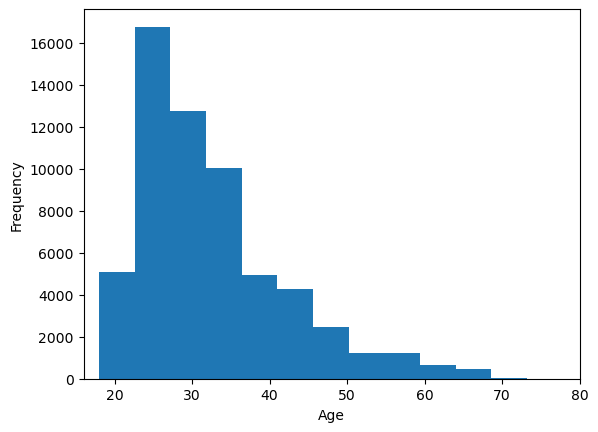

In [37]:
plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()

In [ ]:
# Convert 'drinks' to numeric

In [4]:
df.drinks.value_counts()

socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64

In [5]:
mapping_drinks = {
    'socially': 1,
    'rarely': 2,
    'often': 3,
    'not at all': 4,
    'very often': 5,
    'desperately': 6
}

df['drinks'] = df['drinks'].map(mapping_drinks)

In [6]:
df['drinks'].fillna(0, inplace=True)

In [7]:
df['drinks'].unique()

array([1., 3., 4., 2., 0., 5., 6.])

In [ ]:
# Convert 'drugs' to numeric

In [8]:
df.drugs.value_counts()

never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64

In [9]:
mapping_drugs = {
    'never': 1,
    'sometimes': 2,
    'often': 3
}

df['drugs'] = df['drugs'].map(mapping_drugs)

In [10]:
df['drugs'].fillna(0, inplace=True)

In [11]:
df['drugs'].unique()

array([1., 2., 0., 3.])

In [ ]:
# Convert 'status' to numeric

In [12]:
df.status.value_counts()

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64

In [13]:
mapping_status = {
    'single': 1,
    'seeing someone': 2,
    'available': 3,
    'married': 4,
    'unknown': 5
}

df['status'] = df['status'].map(mapping_status)

In [14]:
df['status'].fillna(0, inplace=True)

In [15]:
df['status'].unique()

array([1, 3, 2, 4, 5])

In [ ]:
# Creating MinMaxScaler

In [20]:
feature_data = df[['drinks', 'drugs', 'status']]


x = feature_data.values

In [23]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

In [24]:
feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)

In [28]:
feature_data.head()

,drinks,drugs,status
0,0.166667,0.333333,0.0
1,0.500000,0.666667,0.0
2,0.166667,0.000000,0.5
3,0.166667,0.000000,0.0
4,0.166667,0.333333,0.0


In [ ]:
# Creating train_test_split

In [29]:
x = df[['drinks', 'drugs']]

In [30]:
y = df['status']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=0)

In [ ]:
# Creating RandomForestClassifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

#Create Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=7)
#Train using training data
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=0)

In [36]:
print(classifier.score(X_test, y_test))

0.9328291814946619


In [38]:
# Create and fit the logistic regression model here:
from sklearn.linear_model import LogisticRegression
cc_lr = LogisticRegression()
cc_lr.fit(X_train,y_train)

/Users/alexlei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
# Save and print the predicted outcomes
y_pred = cc_lr.predict(X_test)
print('predicted classes: ', y_pred)

predicted classes:  [1 1 1 ... 1 1 1]


In [40]:
# Print out the confusion matrix
from sklearn.metrics import confusion_matrix
print('confusion matrix: ')
print(confusion_matrix(y_test, y_pred))

confusion matrix: 
[[16776     0     0     0     0]
 [  586     0     0     0     0]
 [  535     0     0     0     0]
 [   84     0     0     0     0]
 [    3     0     0     0     0]]


In [41]:
# Print accuracy here:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9328291814946619


In [42]:
# Print F1 score here:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].